# Onset Diabetes Prediction in Female Pima Indian Population

**Student Name**: Nidhi Bendre

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV

Purpose: Create a SVM classifier to predict the onset of diabetes using the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). Information on the Pima Indians Diabetes DatabaseLinks to an external site. can be obtained directly from kaggle.com. The link also contains the description of each field in the dataset.

Dataset: [diabetes.csv](https://northeastern.instructure.com/courses/152543/files/24245846?wrap=1) 

### Part 1 
Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. 

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.shape

(768, 9)

In [3]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the shape of the dataset we can see that the number of observations is on the smaller side (768). Based on the mean for outcome is 0.34, which means that more people in the dataset do not have diabetes (as 0 is no diabetes and 1 is diabetes) and this is further supported by the median of 0. This makes sense as the mean of DiabetesPedigreeFunction is 0.47 (correlation between medical history and outcome is lower) and the mean age is 33 (most times diabetes develops later in life). Overall, the statistics show that more observations don't have diabetes than those who do.  

### Part 2
Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. 

Text(0.5, 1.0, 'pairwise patterns in data')

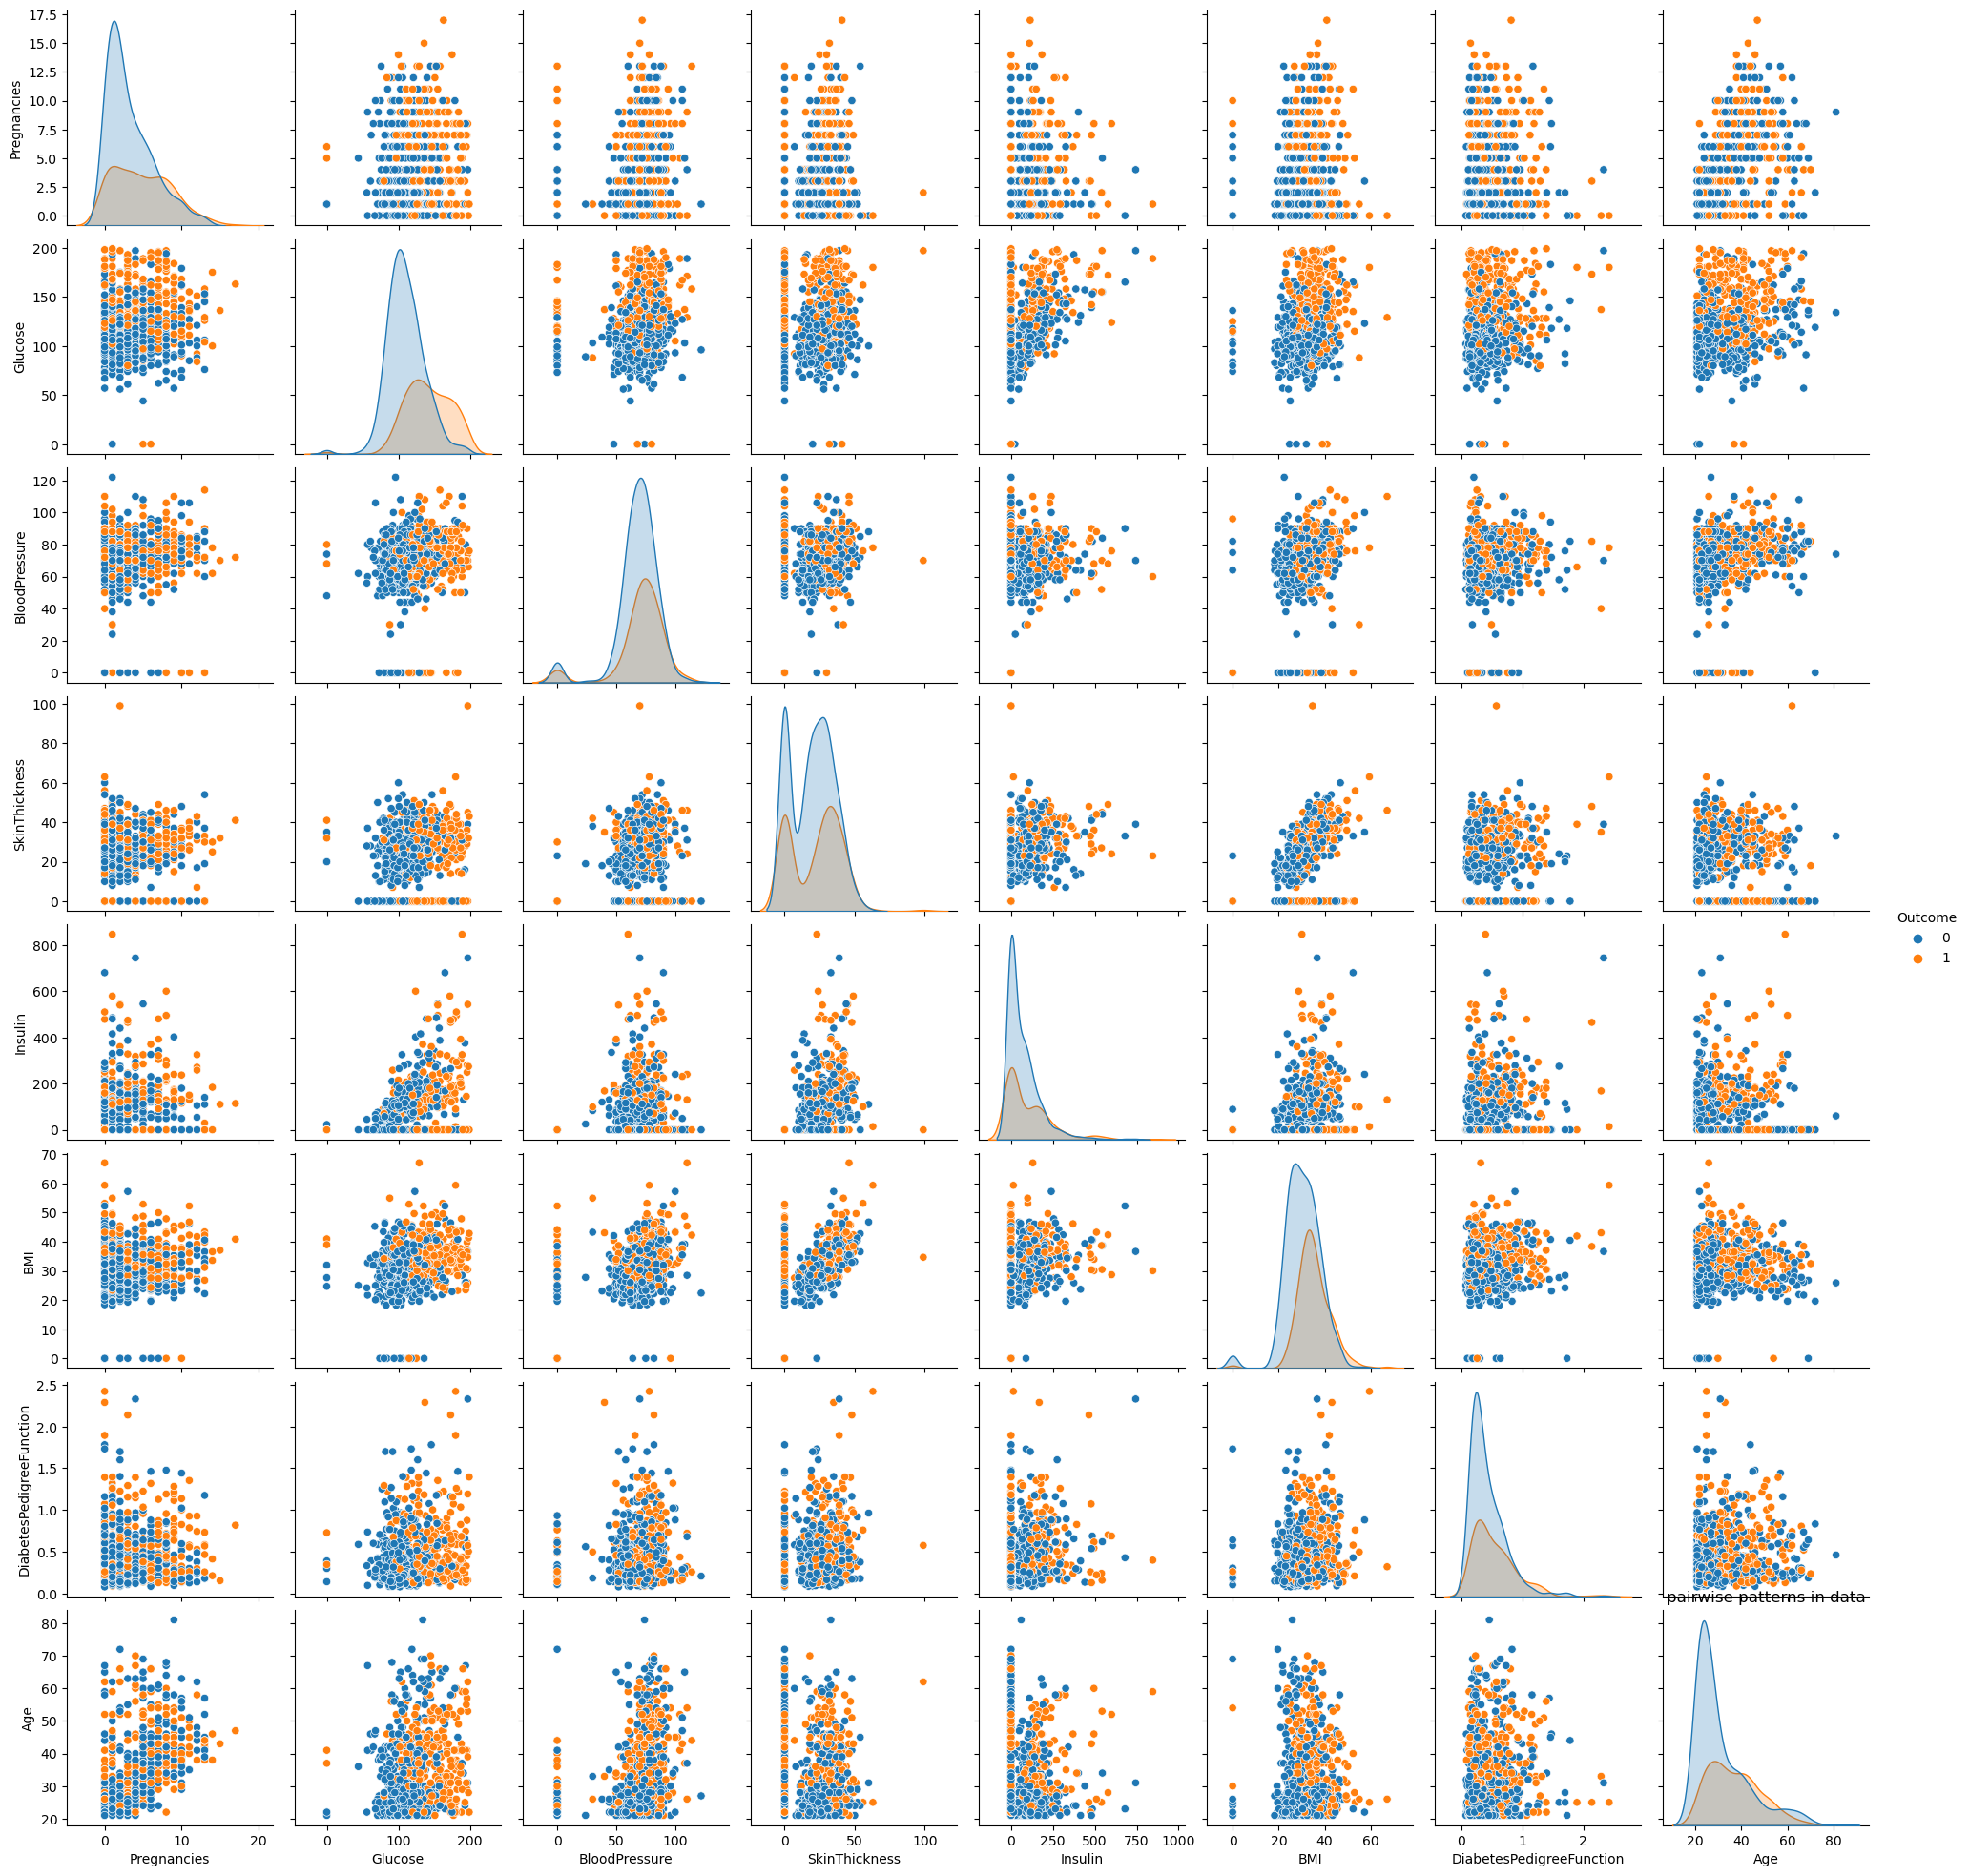

In [4]:
sns.pairplot(diabetes_df, hue='Outcome')
plt.title('pairwise patterns in data')

This pairwise plot shows the relationship between every variable and colors it based on the outcome. Overall, we can see that insulin and glucose, pregnancies and age, and skin thickness and BMI are the most strongly positively correlated. Additionally, pregnancies, skin thickness, insulin, BMI, diabetes pedigree function, and age are skewed to the left for people with and without diabetes while blood presure is pretty symmetric for both otucomes, and lastly glucose is left skewed for no diabetes and pretty spread out for diabetes. In general, glucose is higher for those with diabetes.

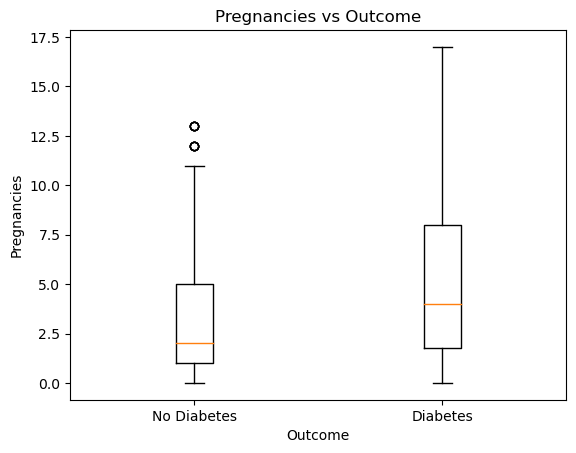

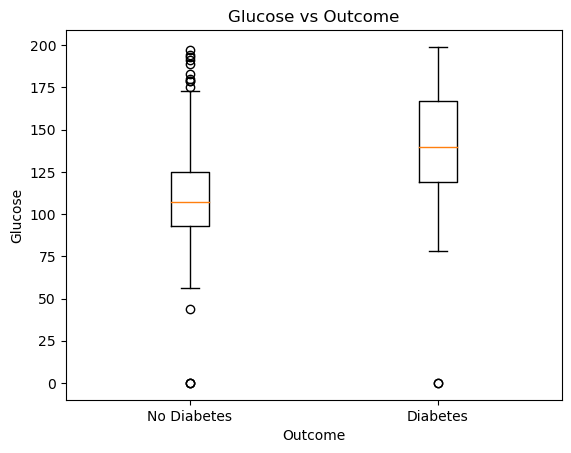

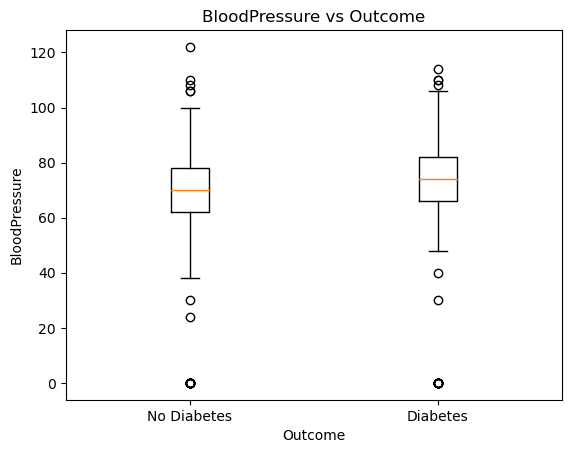

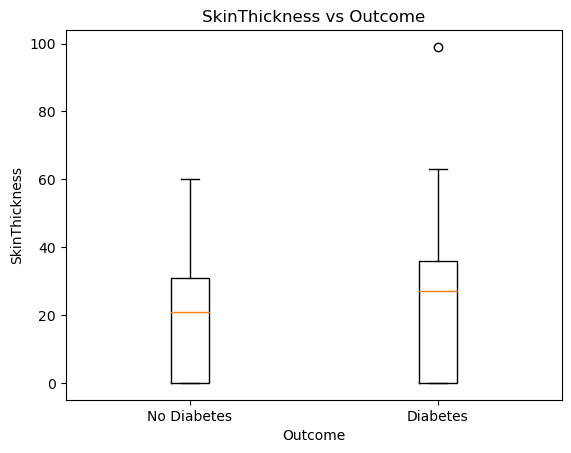

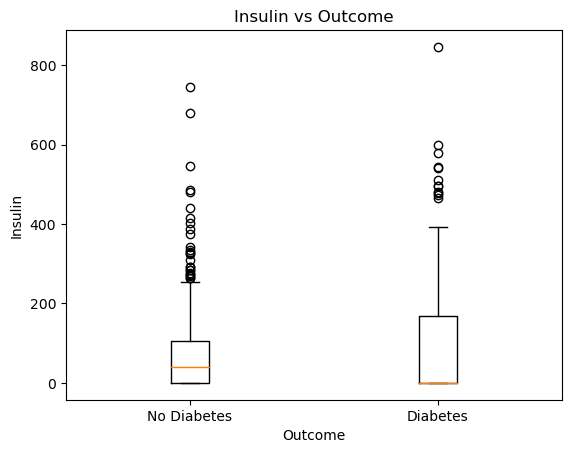

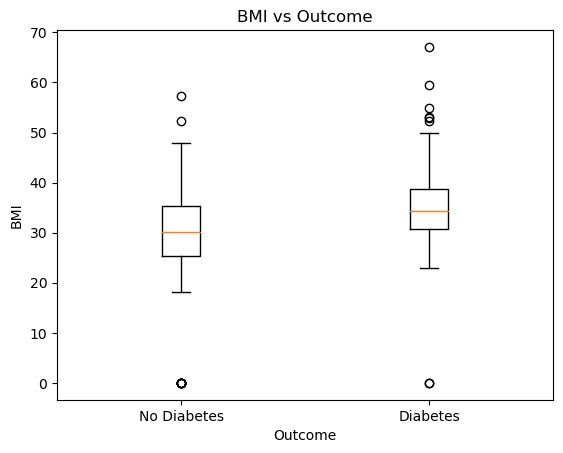

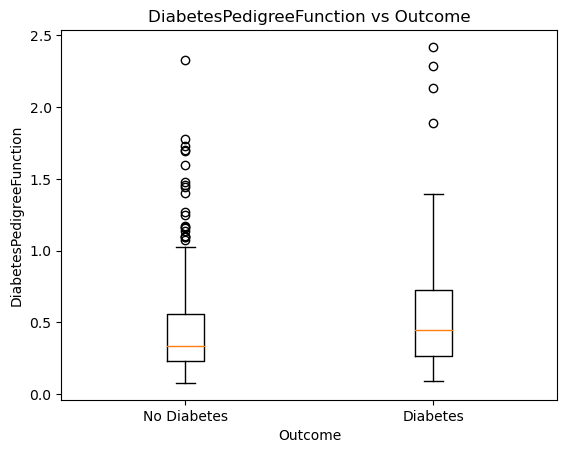

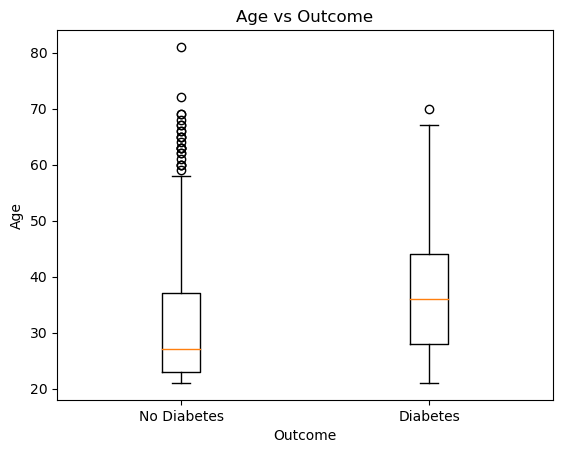

In [5]:
# plot boxplots for every column for diabetes and no diabetes
for column in diabetes_df.columns[:-1]:
    plt.boxplot([diabetes_df[diabetes_df['Outcome'] == 0][column], diabetes_df[diabetes_df['Outcome'] == 1][column]], labels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Outcome')
    plt.ylabel(column)
    plt.title(f'{column} vs Outcome')
    plt.show()

The above boxplots show the distribution of all the columns for both outcomes. For pregnancies, the those without diabetes have a lower average and lower variance of pregnancies than diabetics. The distributions for the features generally overlap, but they differ somewhat for pregnancies, glucose, insulin, BMI, and age.This means that these variables have an effect on whether or not one has diabetes. For example, higher glucose, lower insulin, higher BMI, and older age all correlate with diabetes (as the means for these are higher than the no diabetes means). 

### Part 3  
Evaluate the data for missing or invalid values. 

In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there is no missing data in the dataframe, so no changes need to be made

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Most datatypes are correct, but the outcome column should be changed to a categorical data type. 

In [8]:
diabetes_df['Outcome'] = diabetes_df['Outcome'].astype('category')

Additionally, from the statistical summary in part 1, we see that there are observations where column values are 0 when they shouldn't be (for example a BMI, Glucose, Blood Pressure, Insulin, Skin Thickness of 0 is not possible). These rows can be dropped as imputing almost 50% of the observations will severely alter the distribution of the data. 

In [9]:
diabetes_df[(diabetes_df['Glucose'] == 0) | (diabetes_df['BloodPressure'] == 0) | (diabetes_df['SkinThickness'] == 0) | (diabetes_df['Insulin'] == 0) | (diabetes_df['BMI'] == 0)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
for index, row in diabetes_df.iterrows():
    if row['Glucose'] == 0 or row['BloodPressure'] == 0 or row['SkinThickness'] == 0 or row['Insulin'] == 0 or row['BMI'] == 0:
        diabetes_df = diabetes_df.drop(index)

### Part 4 
Partition the data into train/test sets. 
- normalize numeric data.

In [11]:
#partition the data
X   = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] #get the input features
y   = diabetes_df['Outcome']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

In [12]:
X_train = X_train.copy()
X_test  = X_test.copy()

In [13]:
#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

#scale the training data
X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]) 

In [14]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
27,-0.658152,-0.827547,-0.349952,-1.303593,-0.156624,-1.392977,-0.116195,-0.826231
763,2.308945,-0.701013,0.423953,1.807277,0.151452,-0.008387,-0.996694,3.248344
429,-0.658152,-0.890813,0.888296,-0.360905,0.151452,0.291369,-0.823938,1.260746
108,0.001203,-1.270414,-0.969076,0.204708,-1.096256,0.191450,-0.536940,-0.528092
32,0.001203,-1.112247,-0.969076,-1.680668,-0.818987,-1.164591,-0.729201,-0.826231
...,...,...,...,...,...,...,...,...
71,0.660558,0.501054,-0.504733,0.581783,-0.156624,-0.622174,-0.327960,-0.428712
98,0.990235,-0.954080,-1.588199,0.110439,-0.741968,-0.607900,-0.481212,-0.726851
287,-0.658152,-0.131613,1.197858,0.958858,0.459528,1.804426,0.778237,-0.130572
726,-0.658152,-0.226513,0.578734,0.016170,0.151452,0.448384,-0.091117,-0.528092


### Part 5 
Build the model that predicts the target variable. 

In [15]:
#initialize the classifier
svm = SVC() 
#fit the data
svm.fit(X_train, y_train) 

#scale the new/test data
X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]) #scale the test data

#predict the labels for the test set
y_pred = svm.predict(X_test)

print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The accuracy of the model is: 0.7288135593220338


without tuning any parameters, the accuracy score of the model is 0.73

In [16]:
#setup the parameter grid to try values of c ranging from 0.1 to 2 in steps of 0.1
# and values for gamma ranging from 0 to 1 in steps of 0.01
params = {'C': np.arange(0.1, 2, step=0.1),
         'gamma': np.arange(0, 1, step=0.01)}

svm_new = SVC()

#initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm_new, param_grid = params, cv=5, return_train_score = True)
svm_grid.fit(X_train, y_train)

# get the best parameters and score for best model
print("Best Parameters:", svm_grid.best_params_)
print("Best Score:", svm_grid.best_score_)

Best Parameters: {'C': 1.1, 'gamma': 0.03}
Best Score: 0.8064646464646466


### Part 6
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. 

In [17]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
1003,0.819336,0.005695,0.806465,0.028004
1103,0.816600,0.007433,0.802828,0.029735
903,0.820245,0.006467,0.802761,0.032429
803,0.818423,0.005572,0.802761,0.032429
1402,0.817513,0.006579,0.799192,0.026328


The test score is slightly lower than the training score, indicating some degree of overfitting. The standard deviation is in the range of 0.026 to 0.032, suggesting moderate variability in performance on unseen data. Additionally, the model's accuracy score is 0.81, which means 81% of the time the model correctly predicts whether one has diabetes based on pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree, and age. I don't think that this model should be used in the medical industry for diabetes diagnosis just because it is only predicting the correct outcome 81% of the time, which is very low when it comes to medical diagnosis which we want to be very close to 100% as possible. However, I do believe that further evaluation and work on the model can improve it. 